[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

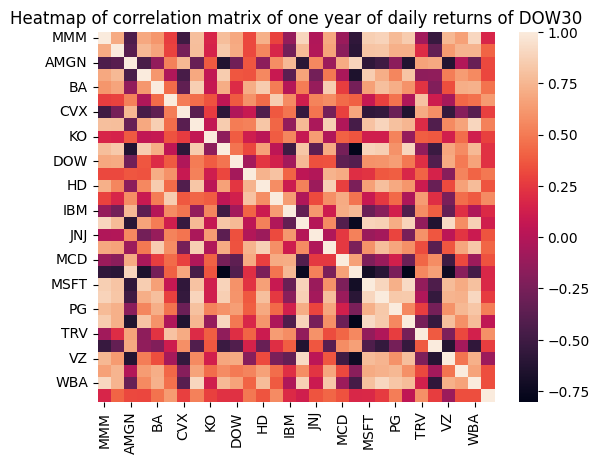

variance explained by each PC: [4.66699785e-01 2.57967571e-01 9.03631090e-02 4.76464027e-02
 4.50298739e-02 2.06935387e-02 1.56253652e-02 1.37724108e-02
 6.97023474e-03 5.80771541e-03 4.86162750e-03 3.97402328e-03
 3.79203118e-03 3.38585178e-03 2.18741917e-03 2.01499847e-03
 1.29320055e-03 1.23260113e-03 1.06108084e-03 8.98497466e-04
 7.64433924e-04 6.59519942e-04 6.17384912e-04 5.71540565e-04
 5.41522197e-04 3.99062624e-04 3.46795146e-04 3.27220170e-04
 2.70142092e-04 2.25041153e-04]
(30,)


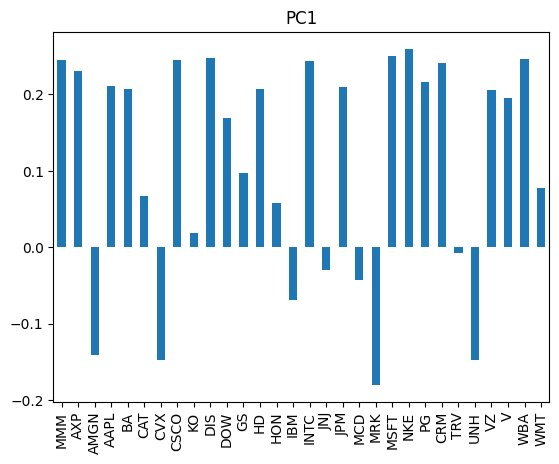

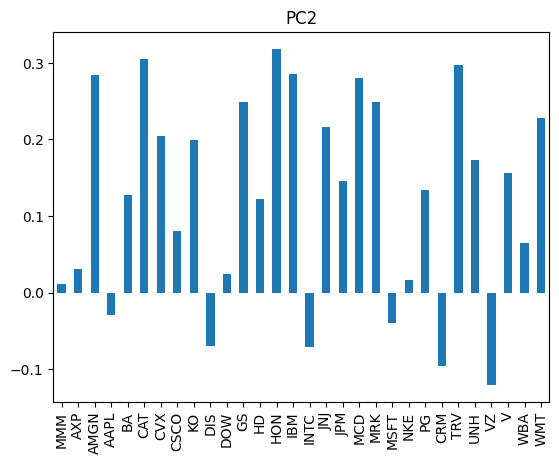

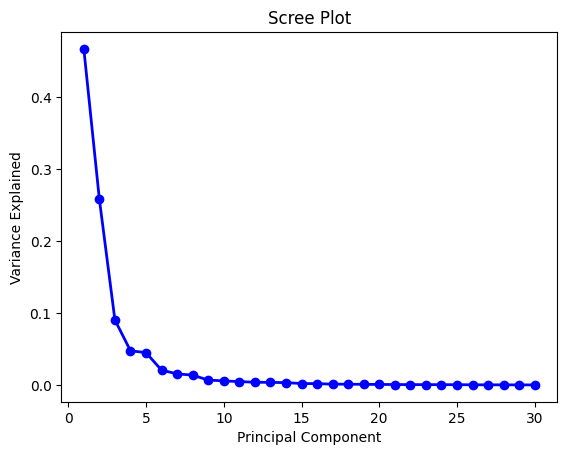

num PCs to explain 95 percent of the variance: 8


/var/folders/bd/th86m1551s194xvf80_8nwyw0000gn/T/ipykernel_35896/2123631481.py:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(PC_scores['pc1'][i], PC_scores['pc2'][i], dow_30[i])


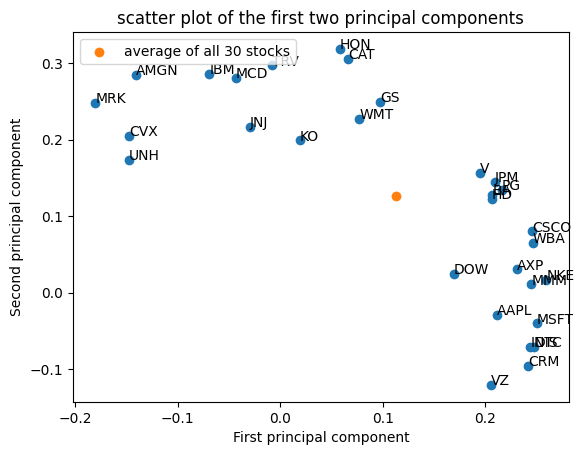

top 3 most distant stocks: Index(['CVX', 'AMGN', 'MRK'], dtype='object')


In [24]:
# Q1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def question_one():
    # DOW30 company list by stock symbol
    dow_30 = ['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 
              'CVX', 'CSCO', 'KO', 'DIS', 'DOW', 'GS',
              'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM',
              'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM',
              'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT']
    
    # dictionary containing one year returns of DOW 30 companies
    returns = {}
    
    for sym in dow_30:
        # get company object
        df = yf.download(sym, '2022-01-01', '2023-01-01')
        
        # return yearly data
        returns[sym] = df['Adj Close'].to_numpy()
    
    # convert dictionary to dataframe
    X = pd.DataFrame.from_dict(returns)
    
    # correlation matrix of yearly returns of DOW30 companies
    corr_matrix = X.corr(method='pearson')
    sns.heatmap(corr_matrix)
    plt.title("Heatmap of correlation matrix of one year of daily returns of DOW30")
    plt.show()
    
    pca = PCA().set_output(transform='pandas')
    
    ss = StandardScaler().set_output(transform = 'pandas')
    X_scaled = ss.fit_transform(X)
    # fit the model and apply the dimensionality reduction on input
    pca.fit_transform(X_scaled)
    
    # create dataframe with PCS from pc1 and pc2
    PC_scores = pd.DataFrame(pca.components_[:2].T, columns=['pc1', 'pc2'], index=X.columns)
    
    # create bar graphs to show the weight of each stock for the first and second principal components
    PC_scores['pc1'].plot.bar().set(title = 'PC1')
    
    plt.figure()
    PC_scores['pc2'].plot.bar().set(title = 'PC2')
    
    # Calculate the amount of variance explained by each principal component
    print("variance explained by each PC:", pca.explained_variance_ratio_)
    
    # make a scree plot 
    plt.figure()
    PC_values = np.arange(pca.n_components_) + 1
    print(pca.explained_variance_ratio_.shape)
    plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.show()

    # calculate how many PCs are needed to explain 95% of the variance
    num_pcs = 0
    total_var_perc = 0
    for var in pca.explained_variance_ratio_:
        if total_var_perc >= 0.95:
            break
        total_var_perc += var
        num_pcs += 1
    
    print("num PCs to explain 95 percent of the variance:", num_pcs)
    # average of PC1 and PC2
    avg_pc1 = np.mean(PC_scores['pc1'])
    avg_pc2 = np.mean(PC_scores['pc2'])

    # create scatter plot of PC1 vs PC2 (with average point plotted)
    fig, ax = plt.subplots()
    ax.scatter(PC_scores['pc1'], PC_scores['pc2'])
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.title("scatter plot of the first two principal components")
    ax.scatter(avg_pc1, avg_pc2, label='average of all 30 stocks')
    plt.legend()

    # label the scatter plot points with respective DOW30 company
    for i in range(len(dow_30)):
        ax.text(PC_scores['pc1'][i], PC_scores['pc2'][i], dow_30[i])
    plt.show()

    # find the euclidean distances between the points on the plot
    # and the average of pc1 and pc2
    pts = np.array((PC_scores['pc1'], PC_scores['pc2'])).T
    avg_point = np.array((avg_pc1, avg_pc2))
    euc_dist = np.linalg.norm(pts - avg_point, axis=1)
    
    # identify the three most distant stocks
    ind = np.argpartition(euc_dist, -3)[-3:]
    top3_dist_stocks = X.columns[ind]
    print("top 3 most distant stocks:", top3_dist_stocks)

question_one()

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

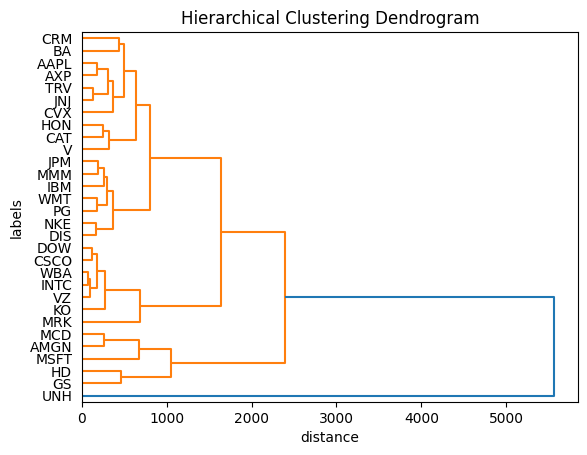

In [26]:
# Q2
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

def question_two():
    # DOW30 company list by stock symbol
    dow_30 = ['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 
              'CVX', 'CSCO', 'KO', 'DIS', 'DOW', 'GS',
              'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM',
              'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM',
              'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT']
    
    # dictionary containing one year returns of DOW 30 companies
    returns = {}
    
    for sym in dow_30:
        # get company object
        df = yf.download(sym, '2022-01-01', '2023-01-01')
        
        # return yearly data
        returns[sym] = df['Adj Close'].to_numpy()
    
    # convert dictionary to dataframe
    X = pd.DataFrame.from_dict(returns)

    # correlation matrix of yearly returns of DOW30 companies
    corr_matrix = X.corr(method='pearson')

    # transform correlation coefficients to produce distances
    # i.e. dij = (2(1 − ρij))**1/2
    dist_matrix = np.sqrt(2*(1 - corr_matrix))

    print("pairwise distances:\n", dist_matrix)

    # create the linkage matrix (with average linkage)
    df = pd.DataFrame.from_dict(returns).transpose()
    Z = linkage(df, method='average')

    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    plt.ylabel('labels')
    dendrogram(
        Z,
        labels=df.index,
        orientation='right'
    )
    plt.show()

question_two()

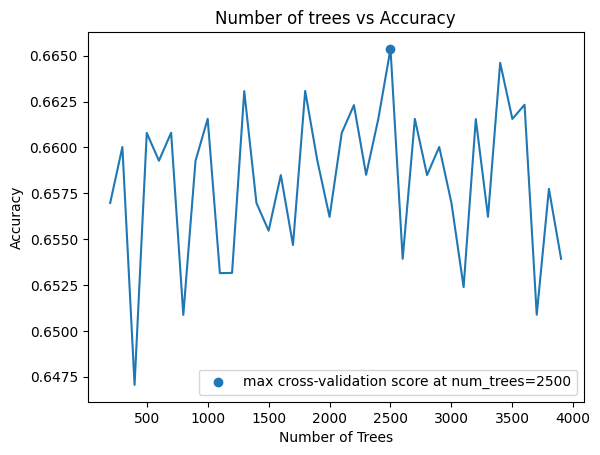

ROC score for rf model: 0.9226341161928306
ROC score for knn model: 0.8780469715698394
ROC score for logistic regression model: 0.8341100123609394


In [9]:
# Q3
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

def question_three():
    # read titanic csv file (age, sex, pclass and survived)
    df = pd.read_csv('titanic3.csv', usecols=['age', 'sex', 'pclass', 'survived'])

    # impute missing values in columns using mean
    df.fillna(df[['age', 'pclass', 'survived']].mean(), inplace=True)

    # transform categorical sex values to numeric
    df['sex'].replace(['female', 'male'], [0, 1], inplace=True)

    X = df[['age', 'pclass', 'sex']]
    y = df['survived']

    cross_val_scores = []

    # find the optimal number of trees 
    num_trees = [int(x) for x in np.arange(start = 200, stop = 4000, step=100)]
    for num_tree in num_trees:
        # fit rf classifier with num trees value
        rf = RandomForestClassifier(n_estimators=num_tree)

        # compute cross-validation for every RF model 
        scores = cross_val_score(rf, X, y, cv=5)

        # append cross-validation accuracy to list
        cross_val_scores.append(scores.mean())
    
    cross_val_scores = np.array(cross_val_scores)
    max_pos = np.argmax(cross_val_scores)
    max_cross_val = np.amax(cross_val_scores)

    plt.plot(num_trees, cross_val_scores)
    plt.scatter(num_trees[max_pos], max_cross_val, label=f'max cross-validation score at num_trees={num_trees[max_pos]}')
    plt.title('Number of trees vs Accuracy')
    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # find the best k param for KNN
    k_cross_val_scores = []
    for k in range(1, 30):
        # fit KNN model with k
        knn = KNeighborsClassifier(n_neighbors=k)

        # compute cross-validation for every KNN model 
        scores = cross_val_score(knn, X, y, cv=5)

        # append cross-validation accuracy to list
        k_cross_val_scores.append(scores.mean())
    
    k_cross_val_scores = np.array(k_cross_val_scores)
    best_k = list(range(1, 30))[np.argmax(k_cross_val_scores)]

    # create Random Forest model with best number of trees
    rf = RandomForestClassifier(n_estimators=num_trees[max_pos]).fit(X, y)

    # create KNN model with best k
    knn = KNeighborsClassifier(n_neighbors=best_k).fit(X, y)
    
    # create logistic regression model
    clf = LogisticRegression(random_state=0).fit(X, y)

    # calculate ROC scores for all 3 models
    print("ROC score for rf model:", roc_auc_score(y, rf.predict_proba(X)[:, 1]))
    print("ROC score for knn model:", roc_auc_score(y, knn.predict_proba(X)[:, 1]))
    print("ROC score for logistic regression model:", roc_auc_score(y, clf.predict_proba(X)[:, 1]))

question_three()

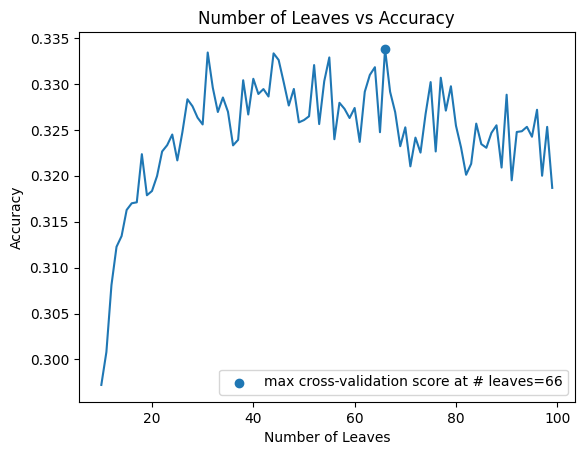

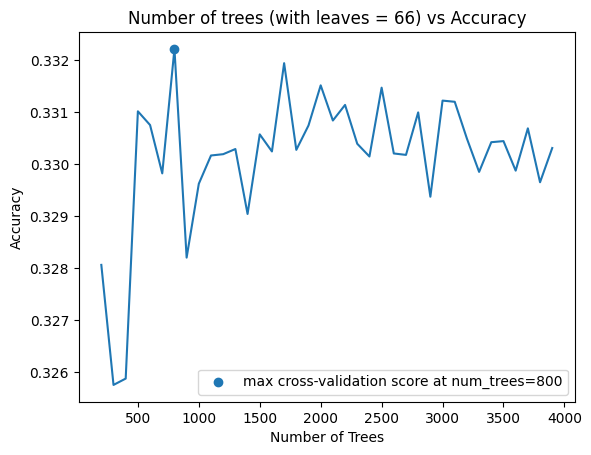

R-squared value for Random Forest Reegressor Model: 0.3652494212653904
MSE for Random Forest Regressor model: 0.4148690110698237


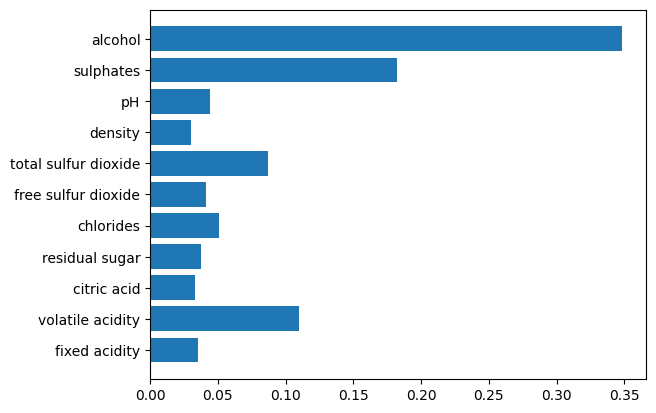

In [20]:
# Q4

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def question_four():
    # read red wine csv file
    df_red = pd.read_csv('winequality-red.csv', sep=';')

    X = df_red.drop("quality", axis=1)
    y = df_red["quality"]

    cross_val_scores = []

    # find the optimal number of leaves
    for num_leaves in range(10, 100):
        # fit rf classifier with num trees value
        rf = RandomForestRegressor(max_leaf_nodes=num_leaves)

        # compute cross-validation for every RF model 
        scores = cross_val_score(rf, X, y, cv=5)

        # append cross-validation accuracy to list
        cross_val_scores.append(scores.mean())
    
    cross_val_scores = np.array(cross_val_scores)
    max_pos = np.argmax(cross_val_scores)
    max_cross_val = np.amax(cross_val_scores)
    num_leaves = np.arange(10, 100)
    best_num_leaves = num_leaves[max_pos]
    plt.plot(num_leaves, cross_val_scores)
    plt.scatter(num_leaves[max_pos], max_cross_val, label=f'max cross-validation score at # leaves={num_leaves[max_pos]}')
    plt.title('Number of Leaves vs Accuracy')
    plt.xlabel('Number of Leaves')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # find the optimal number of trees (with optimal number of leaves)
    cross_val_scores = []

    # find the optimal number of trees 
    num_trees = [int(x) for x in np.arange(start = 200, stop = 4000, step=100)]
    for num_tree in num_trees:
        # fit rf classifier with num trees value
        rf = RandomForestRegressor(n_estimators=num_tree, max_leaf_nodes=best_num_leaves)

        # compute cross-validation for every RF model 
        scores = cross_val_score(rf, X, y, cv=5)

        # append cross-validation accuracy to list
        cross_val_scores.append(scores.mean())
    
    cross_val_scores = np.array(cross_val_scores)
    max_pos = np.argmax(cross_val_scores)
    max_cross_val = np.amax(cross_val_scores)
    best_num_trees = num_trees[max_pos]
    plt.plot(num_trees, cross_val_scores)
    plt.scatter(num_trees[max_pos], max_cross_val, label=f'max cross-validation score at num_trees={num_trees[max_pos]}')
    plt.title(f'Number of trees (with leaves = {best_num_leaves}) vs Accuracy')
    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    # Provide a bar graph showing the importance of each feature 
    rf = RandomForestRegressor(n_estimators=best_num_trees, max_leaf_nodes=best_num_leaves).fit(X_train, y_train)
    plt.barh(X.columns, rf.feature_importances_)

    # predict outcomes of test set
    y_pred = rf.predict(X_test)

    # calculate r-squared of random forest regressor model
    r_squared_rf = rf.score(X_test, y_test)
    print("R-squared value for Random Forest Reegressor Model:", r_squared_rf)

    # calculate MSE
    mse_rf = mean_squared_error(y_test, y_pred)
    print("MSE for Random Forest Regressor model:", mse_rf)



question_four()